In [1]:
import pandas as pd
dic = """
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's"""
df = pd.read_csv("hou_all.csv")
df.head()
dic


"\n    1. CRIM      per capita crime rate by town\n    2. ZN        proportion of residential land zoned for lots over\n                 25,000 sq.ft.\n    3. INDUS     proportion of non-retail business acres per town\n    4. CHAS      Charles River dummy variable (= 1 if tract bounds\n                 river; 0 otherwise)\n    5. NOX       nitric oxides concentration (parts per 10 million)\n    6. RM        average number of rooms per dwelling\n    7. AGE       proportion of owner-occupied units built prior to 1940\n    8. DIS       weighted distances to five Boston employment centres\n    9. RAD       index of accessibility to radial highways\n    10. TAX      full-value property-tax rate per $10,000\n    11. PTRATIO  pupil-teacher ratio by town\n    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks\n                 by town\n    13. LSTAT    % lower status of the population\n    14. MEDV     Median value of owner-occupied homes in $1000's"

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>,
        <Axes: title={'center': 'MIS'}>, <Axes: >]], dtype=object)

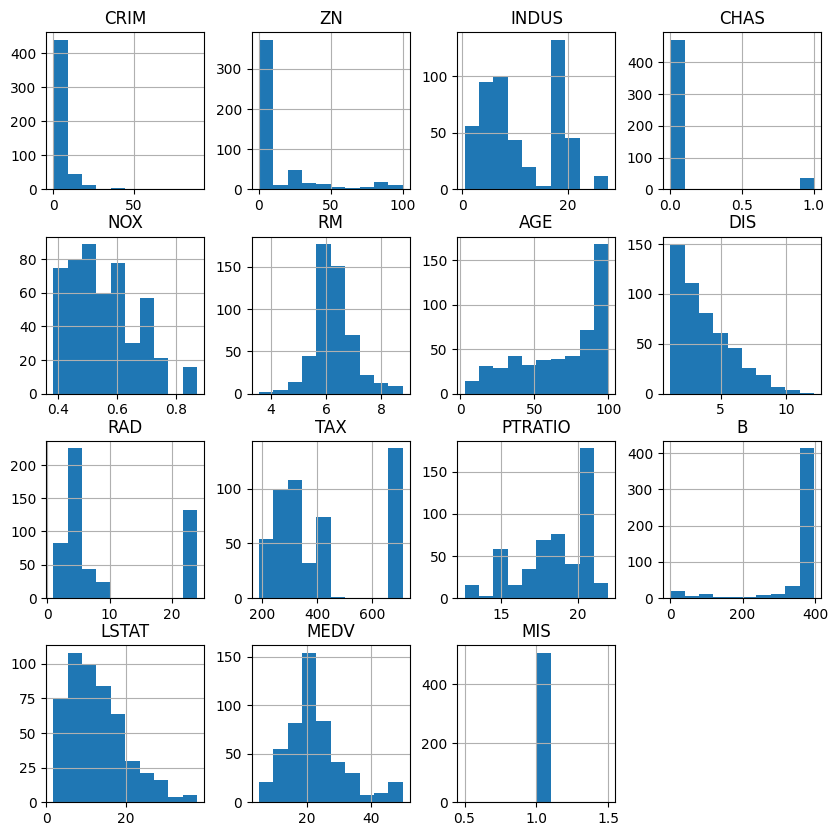

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(figsize=(10,10))

In [3]:
import numpy as np
#np.random.seed(1)
'''
def traintest(data,ratios):
    """_summary_

    Args:
        data (_type_): the data to be shuffled
        ratios (float): percent of data for training

    Returns:
        train (_type_): the training data
        test (_type_): the testing data
    """
    np.random.permutation(data)
    train=data[:int(ratios*len(data))]
    test=data[int(ratios*len(data)):]
    return train,test
traindf ,testdf = traintest(df,0.85)
'''


'\ndef traintest(data,ratios):\n    """_summary_\n\n    Args:\n        data (_type_): the data to be shuffled\n        ratios (float): percent of data for training\n\n    Returns:\n        train (_type_): the training data\n        test (_type_): the testing data\n    """\n    np.random.permutation(data)\n    train=data[:int(ratios*len(data))]\n    test=data[int(ratios*len(data)):]\n    return train,test\ntraindf ,testdf = traintest(df,0.85)\n'

In [4]:
#len(df)
#traindf.head()

In [5]:
#traindf["CHAS"].value_counts()

In [4]:
#if chas is important if its not in one of it it would be bad
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["CHAS"]):
    stestset  = df.loc[test_index]
    strainset = df.loc[train_index]


In [5]:
stestset["CHAS"].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [6]:
strainset["CHAS"].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [7]:
corr_max = df.corr()
corr_max["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
MIS             NaN
Name: MEDV, dtype: float64

In [8]:
df.MIS.value_counts()

MIS
1    506
Name: count, dtype: int64

In [9]:
df.drop("MIS", axis=1, inplace=True)

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


array([[<Axes: xlabel='CRIM', ylabel='CRIM'>,
        <Axes: xlabel='AGE', ylabel='CRIM'>,
        <Axes: xlabel='B', ylabel='CRIM'>,
        <Axes: xlabel='MEDV', ylabel='CRIM'>],
       [<Axes: xlabel='CRIM', ylabel='AGE'>,
        <Axes: xlabel='AGE', ylabel='AGE'>,
        <Axes: xlabel='B', ylabel='AGE'>,
        <Axes: xlabel='MEDV', ylabel='AGE'>],
       [<Axes: xlabel='CRIM', ylabel='B'>,
        <Axes: xlabel='AGE', ylabel='B'>, <Axes: xlabel='B', ylabel='B'>,
        <Axes: xlabel='MEDV', ylabel='B'>],
       [<Axes: xlabel='CRIM', ylabel='MEDV'>,
        <Axes: xlabel='AGE', ylabel='MEDV'>,
        <Axes: xlabel='B', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>]], dtype=object)

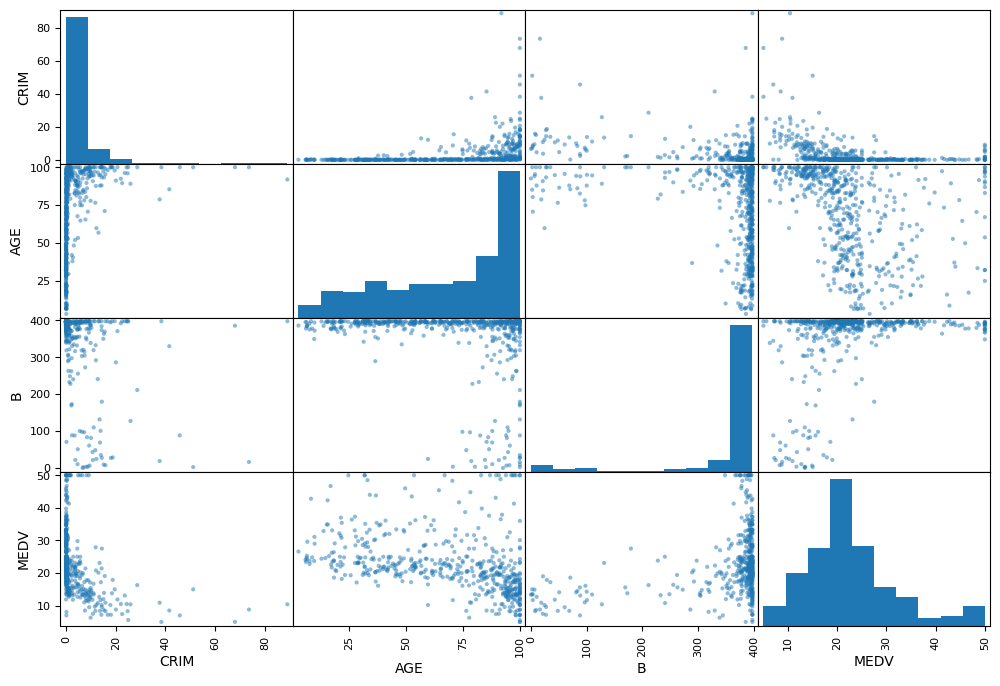

In [11]:
from pandas.plotting import scatter_matrix
attributes = ["CRIM","AGE","B","MEDV"]
scatter_matrix(df[attributes],figsize=(12,8))

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
xtr,ytr = strainset.drop("MEDV",axis=1),strainset["MEDV"]
print(xtr.shape,ytr.shape)

(404, 14) (404,)


In [16]:
df["TAXRM"] = df["TAX"]/df["RM"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])
housing_tr = my_pipeline.fit_transform(xtr)

In [18]:
housing_tr.shape


(404, 14)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
dtmodel = DecisionTreeRegressor()
lrmodel = LinearRegression()
rfmodel = RandomForestRegressor()
rfmodel.fit(housing_tr,ytr)
lrmodel.fit(housing_tr, ytr)
dtmodel.fit(housing_tr, ytr)

DecisionTreeRegressor()

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfmodel, housing_tr, ytr, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

3.392172292141409

In [21]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [22]:
print_scores(rmse_scores)

Scores: [2.77077411 2.6728431  4.46402504 2.74059789 3.48846297 2.83130337
 4.64432953 3.41563722 3.53509871 3.35865098]
Mean:  3.392172292141409
Standard deviation:  0.6626336495665232


In [23]:
from sklearn.metrics import mean_squared_error
X_test = stestset.drop("MEDV", axis=1)
Y_test = stestset["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = rfmodel.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.9062306697649354

In [26]:
from sklearn.model_selection import GridSearchCV
grid = {'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'random_state': [42, 100, 200]}
clf = GridSearchCV(rfmodel,grid)
rf = RandomForestRegressor()
gscv = GridSearchCV(estimator=rf, param_grid=grid, cv=5,verbose=True)
gscv.fit(housing_tr,ytr)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42, 100, 200]},
             verbose=True)

In [27]:
best_model = gscv.best_estimator_
best_params = gscv.best_params_
print(best_model,'and the params are',best_params)

RandomForestRegressor(max_depth=7, random_state=200) and the params are {'max_depth': 7, 'n_estimators': 100, 'random_state': 200}


In [28]:
clf = RandomForestRegressor(max_depth=7, n_estimators=100,random_state=200)
clf.fit(housing_tr,ytr)

RandomForestRegressor(max_depth=7, random_state=200)

In [29]:
scores = cross_val_score(clf, housing_tr, ytr, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()
print_scores(rmse_scores)



Scores: [2.90407636 2.77860544 4.42695084 2.76011372 3.3851922  2.71353142
 4.86558299 3.3838601  3.23918623 3.32289342]
Mean:  3.3779992717347604
Standard deviation:  0.6886778989266908


In [30]:
from joblib import dump, load
dump(rfmodel, 'housingregression.joblib')

['housingregression.joblib']

In [31]:
housing_tr

array([[-0.43942006,  3.12628155, -1.12165014, ...,  0.41164221,
        -0.86091034,  0.        ],
       [-0.44352175,  3.12628155, -1.35893781, ...,  0.39131918,
        -0.94116739,  0.        ],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.44624347,
         0.81480158,  0.        ],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ...,  0.41831233,
        -1.27603303,  0.        ],
       [ 0.14210728, -0.4898311 ,  0.98336806, ..., -3.15239177,
         0.73869575,  0.        ],
       [-0.43974024, -0.4898311 ,  0.37049623, ...,  0.41070422,
         0.09940681,  0.        ]])